In [13]:
#Getting all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the provided dataset by skiping first six rows of data present in csv (using the windows-1252 encoding since th default utf8 did gave an error)
df = pd.read_csv("messy_ice_detention.csv", skiprows=6, encoding='cp1252')
print(df.head(5))

                                 Name        City State      Level A  \
0             ADAMS COUNTY DET CENTER     NATCHEZ    MS  1876.461078   
1      ADELANTO ICE PROCESSING CENTER    ADELANTO    CA     6.401198   
2  ALAMANCE COUNTY DETENTION FACILITY      GRAHAM    NC     4.329341   
3        ALEXA$NDRIA STAGING FACILITY  ALEXANDRIA    LA   137.520958   
4                ALLEGANY COUNTY JAIL     BELMONT    NY     1.221557   

      Level B    Level C    Level D Last Inspection End Date  
0  266.431138   6.724551   4.257485                    45673  
1    4.323353  22.604790  32.634731                    45491  
2    3.461078   6.083832   6.185629                    45554  
3   47.413174  76.005988  52.485030                    45533  
4    0.018000   0.000000   0.000000                      NaN  


In [3]:
#Checking the datatypes for each column
df.dtypes

Name                         object
City                         object
State                        object
Level A                     float64
Level B                     float64
Level C                     float64
Level D                     float64
Last Inspection End Date     object
dtype: object

In [4]:
#Checking for any null values
df.isna().sum()

Name                         0
City                         0
State                        0
Level A                      0
Level B                      0
Level C                      0
Level D                      0
Last Inspection End Date    17
dtype: int64

In [5]:
#Checking for empty values in Name, City, State columns
print("Missing Name:")
print(df[df['Name']==" "])
print("-------------------")

print("Missing City:")
print(df[df['City']==" "])
print("-------------------")

print("Missing State:")
print(df[df['State']==" "])
print("-------------------")

Missing Name:
    Name       City State   Level A   Level B    Level C    Level D  \
116       ELK RIVER    MN  4.592814  5.598802   9.281437   2.760479   
123           DOVER    NH  0.000000  0.000000  49.161677  41.335329   

    Last Inspection End Date  
116                    45414  
123                    45547  
-------------------
Missing City:
                  Name City State    Level A   Level B   Level C   Level D  \
51  GEAUGA COUNTY JAIL         OH  24.676647  13.05988  7.580838  2.694611   

   Last Inspection End Date  
51                    45687  
-------------------
Missing State:
                                         Name     City State    Level A  \
6                              ATLANTA US PEN  ATLANTA        17.341317   
71  LA SALLE COUNTY REGIONAL DETENTION CENTER  ENCINAL         8.910180   

     Level B   Level C   Level D Last Inspection End Date  
6   3.610778  3.053892  2.724551                      NaN  
71  0.706587  0.000000  0.071900               

In [6]:
#Filling in missing values for Name, State, City columns (through google search)
df.loc[116, "Name"] = 'Sherburne County Jail'
df.loc[123, "Name"] = 'Strafford County Corrections'
df.loc[51, "City"] = 'Chardon'
df.loc[71, "State"] = 'TX'
df.loc[6, "State"] = 'GA'

#Changing all values to uppercase
df['Name'] = df['Name'].str.upper()
df['City'] = df['City'].str.upper()
df['State'] = df['State'].str.upper()

In [7]:
#Since only state code is given, mapping the code to full state names
state_mapping = {"AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"}

df['StateName'] = df['State'].map(state_mapping)
df.sample(5)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491,California
108,RIO GRANDE DET)ENTION CENTER,LAREDO,TX,616.610778,6.610778,1.449102,1.245509,45666,Texas
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533,Louisiana
7,B^AKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,45589,Florida
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,45638,Texas


In [8]:
#Checking if the Name column has any characters besides alphabetic (and spaces)
df[~df['Name'].astype(str).str.match(r'^[A-Za-z ]+$', na=False)]

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533,Louisiana
5,ALL%EN PARISH PUBLIC SAFETY +COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,45638,Louisiana
6,ATLANTA US PEN,ATLANTA,GA,17.341317,3.610778,3.053892,2.724551,NaN,Georgia
7,B^AKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,45589,Florida
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaN,New Hampshire
15,CALHOUN C(OUNTY CORRECTIONAL CENTER,BATTLE CREEK,MI,56.784431,35.293413,30.982036,15.952096,45526,Michigan
17,"CCA, FLORENCE CORRECTIONAL CENTER",FLORENCE,AZ,50.449102,40.622754,145.221557,141.742515,45638,Arizona
18,CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.970060,221.209581,344.790419,207.161677,45666,Louisiana
22,CIMMARR.ON CORR FACILITY,CUSHING,OK,17.059880,3.670659,0.311377,0.000000,NaN,Oklahoma
28,CUMB^ERLAND COUNTY JAIL,PORTLAND,ME,7.532934,1.137725,19.796407,16.892216,45547,Maine


In [9]:
#Removing all special characters (besides brackets ())
df['Name'] = df['Name'].str.replace(r"[.\^@%*\+\-#$,_/&]", "", regex=True)

In [10]:
#Recheking Name column for any unique characters
df[~df['Name'].astype(str).str.match(r'^[A-Za-z ]+$', na=False)]

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName
6,ATLANTA US PEN,ATLANTA,GA,17.341317,3.610778,3.053892,2.724551,NaN,Georgia
15,CALHOUN C(OUNTY CORRECTIONAL CENTER,BATTLE CREEK,MI,56.784431,35.293413,30.982036,15.952096,45526,Michigan
18,CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.970060,221.209581,344.790419,207.161677,45666,Louisiana
33,DE)SERT VIEW ANNEX,ADELANTO,CA,211.125748,28.167665,72.089820,95.694611,45715,California
43,ETOWAH COUNTY JAIL (ALABAMA),GADSDEN,AL,1.083832,1.251497,1.125749,0.341317,44533,Alabama
46,FLORENCE SERVICE) PROCESSING CENTER,FLORENCE,AZ,303.556886,71.790419,1.508982,1.485030,45701,Arizona
60,IAH SECURE ADULT DETENTION FACILITY (POLK),LIVINGSTON,TX,679.407186,67.041916,28.820359,11.748503,45701,Texas
66,KARNES COUNTY CORRECTIONAL) CENTER,KARNES CITY,TX,0.347305,0.215569,0.988024,0.047900,45394,Texas
91,ORANGE COUNTY JAIL (FL),ORLANDO,FL,1.892216,1.556886,2.670659,1.365269,45519,Florida
92,ORANGE COUNTY JAIL (NY),GOSHEN,NY,30.353293,27.898204,15.413174,15.317365,45638,New York


In [11]:
#Removing all open and close brackets without accompanying close and open brackets
#For this code, chatgpt was used using the prompt: For a column containing names, remove brackets if there is a start ["("] but no end [")"] and end [")"] but no start ["("]. If both open and close brackets are present, ignore them and keep them as they are
df['Name'] = (df['Name'].str.replace(r"\([^)]*$", "", regex=True).str.replace(r"^[^(]*\)", "", regex=True))

In [12]:
#Recheking Name column for any unique characters
df[~df['Name'].astype(str).str.match(r'^[A-Za-z ]+$', na=False)]

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName
6,ATLANTA US PEN,ATLANTA,GA,17.341317,3.610778,3.053892,2.724551,NaN,Georgia
18,CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.970060,221.209581,344.790419,207.161677,45666,Louisiana
43,ETOWAH COUNTY JAIL (ALABAMA),GADSDEN,AL,1.083832,1.251497,1.125749,0.341317,44533,Alabama
60,IAH SECURE ADULT DETENTION FACILITY (POLK),LIVINGSTON,TX,679.407186,67.041916,28.820359,11.748503,45701,Texas
91,ORANGE COUNTY JAIL (FL),ORLANDO,FL,1.892216,1.556886,2.670659,1.365269,45519,Florida
92,ORANGE COUNTY JAIL (NY),GOSHEN,NY,30.353293,27.898204,15.413174,15.317365,45638,New York
106,PRINCE EDWARD COUNTY (FARMVILLE),FARMVILLE,VA,149.485030,68.167665,128.209581,141.850299,45645,Virginia
111,SAIPAN DEPARTMENT OF CORRECTIONS (SUSUPE),SAIPAN,MP,2.179641,1.934132,0.562874,0.000000,45359,NaN
127,TULSA COUNTY JAIL (DAVID L MOSS JUSTICE CTR),TULSA,OK,5.868263,3.760479,2.508982,1.287425,45554,Oklahoma
131,WEBB COUNTY DETENTION CENTER (CCA),LAREDO,TX,234.455090,4.335329,27.724551,52.934132,45694,Texas


In [ ]:
#Since it seems like the Name at index 6 still has some hidden characters, will inspect it more
df.loc[6, "Name"]

'ATLANTA\xa0US\xa0PEN'

In [152]:
#Removing special character '\xa0'
df['Name'] = df['Name'].str.replace(r"\xa0", " ", regex=True)
df.loc[6, "Name"]

'ATLANTA US PEN'

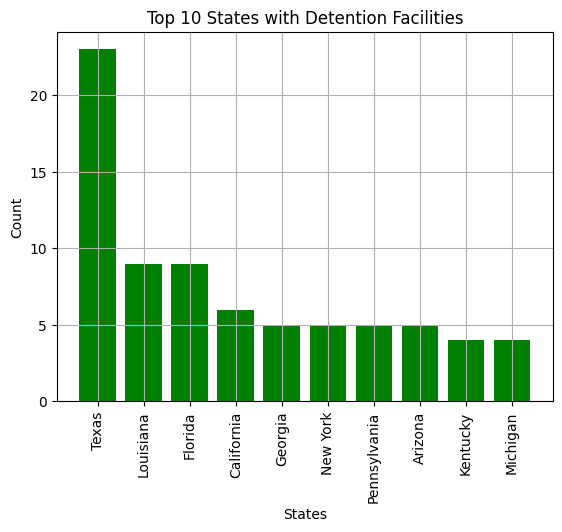

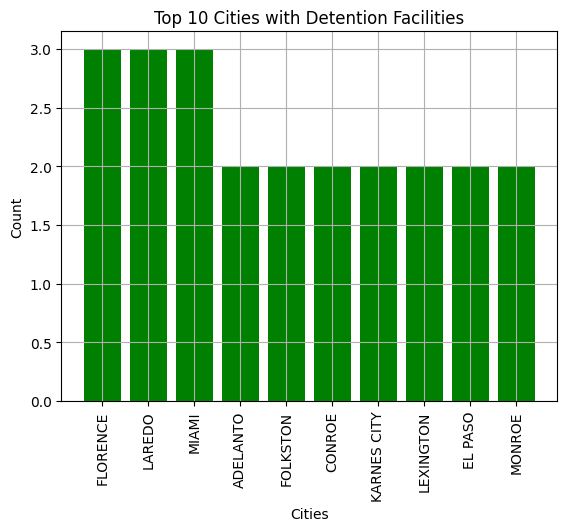

In [ ]:
#Simple EDA

#Showing top 10 cities and states with detention facilities
def top_graphs(df, col_name, xvalue):
    top_df = df[col_name].value_counts().reset_index().head(10)
    plt.bar(top_df[col_name], top_df['count'], color = 'green')
    plt.xlabel(f"{xvalue}")
    plt.ylabel("Count")
    plt.title(f"Top 10 {xvalue} with Detention Facilities")
    plt.xticks(rotation = 90)
    plt.grid()
    plt.show()

top_graphs(df, 'StateName', "States")
top_graphs(df, 'City', "Cities")

In [173]:
#Adding all values for population from Level columns
df['Total Population'] = df['Level A'] + df['Level B'] + df['Level C'] + df['Level D']
df.sample(5)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName,Total Population
68,KAY CO JUSTICE FACILITY,NEWKIRK,OK,38.994012,22.053892,20.215569,12.341317,45723,Oklahoma,93.604790
41,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1041.886228,45.538922,114.688623,125.610778,45596,Arizona,1327.724551
105,ND DETENTION CENTER,ALVARADO,TX,251.053892,83.898204,202.988024,122.532934,45645,Texas,660.473054
13,BUFFALO SERVICE PROCESSING CENTER,BATAVIA,NY,235.688623,46.083832,133.586826,151.275449,45596,New York,566.634731
75,LIMESTONE COUNTY DETENTION CENTER,GROESBECK,TX,15.862275,1.670659,3.646707,2.790419,45561,Texas,23.970060


In [174]:
#Getting top 10 detention facilities based on total population
df_10 = df.sort_values(by='Total Population', ascending=False).head(10)
df_10

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,StateName,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673,Mississippi,2153.874252
119,SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1299.083832,106.125749,188.724551,68.197605,45694,Texas,1662.131736
122,STEWART DETENTION CENTER,LUMPKIN,GA,743.311377,194.928144,371.562874,328.041916,45505,Georgia,1637.844311
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1013.023952,214.772455,187.005988,94.580838,45673,Louisiana,1509.383233
93,OTAY MESA DETENTION CENTER,SAN DIEGO,CA,800.826347,470.119760,45.479042,46.215569,45603,California,1362.640719
41,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1041.886228,45.538922,114.688623,125.610778,45596,Arizona,1327.724551
83,MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,205.245509,96.467066,542.275449,402.059880,45722,Pennsylvania,1246.047904
82,MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,149.556886,561.425150,355.269461,160.976048,45631,Texas,1227.227545
18,CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),JENA,LA,410.970060,221.209581,344.790419,207.161677,45666,Louisiana,1184.131736
31,DENVER CONTRACT DETENTION FACILITY,AURORA,CO,624.568862,190.508982,189.658683,141.365270,45701,Colorado,1146.101796


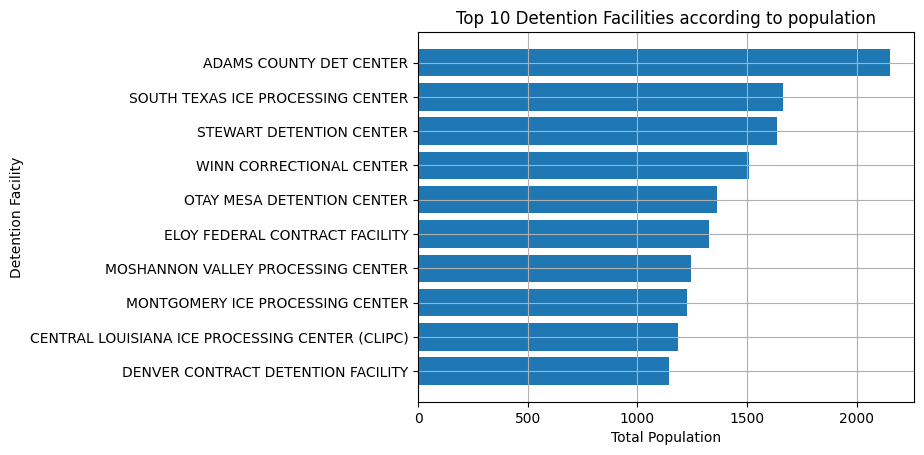

In [ ]:
#Plotting top 10 facilities based on population
plt.barh(df_10['Name'], df_10['Total Population'])
plt.ylabel("Detention Facility")
plt.xlabel("Total Population")
plt.title(f"Top 10 Detention Facilities according to population")
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [188]:
#Getting the top states with total population
top_10_states = df.groupby('StateName')[['Total Population']].sum().reset_index().sort_values(by="Total Population", ascending = False).head(10)
top_10_states

,StateName,Total Population
34,Texas,12202.682696
13,Louisiana,7026.580838
3,California,3082.359281
6,Georgia,2551.850299
1,Arizona,2309.712575
18,Mississippi,2170.125749
5,Florida,1690.095808
30,Pennsylvania,1528.802395
24,New Mexico,1374.580838
4,Colorado,1146.101796


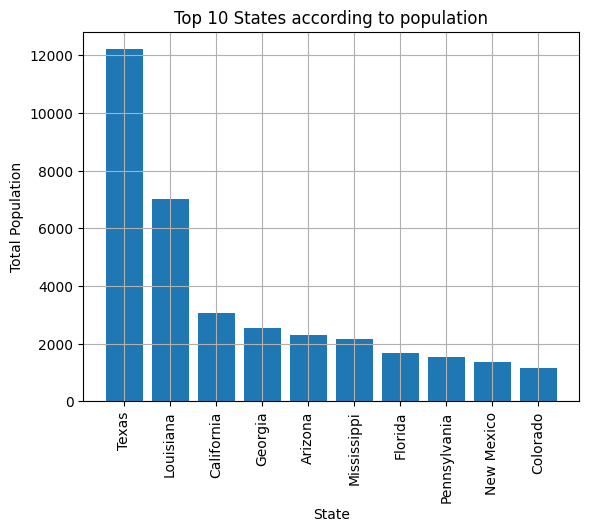

In [194]:
#Plotting top 10 States based on population
plt.bar(top_10_states['StateName'], top_10_states['Total Population'])
plt.xlabel("State")
plt.ylabel("Total Population")
plt.title(f"Top 10 States according to population")
plt.xticks(rotation=90)
plt.grid()
plt.show()